<a href="https://colab.research.google.com/github/pminchara/ML-Assignments/blob/main/ML_Assignment_Week8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [ ]:
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

orig x_train shape: (4999, 32, 32, 3)


In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

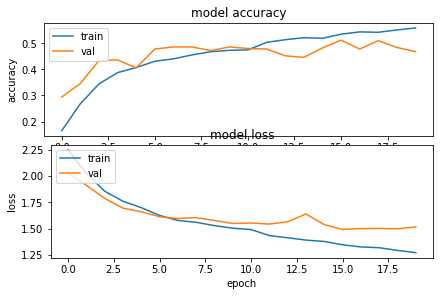

In [ ]:
use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

In [ ]:
	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

In [ ]:
preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       505
           1       0.89      0.55      0.68       460
           2       0.45      0.65      0.53       519
           3       0.59      0.37      0.46       486
           4       0.50      0.57      0.53       519
           5       0.50      0.63      0.56       488
           6       0.73      0.58      0.65       518
           7       0.61      0.69      0.65       486
           8       0.66      0.75      0.70       520
           9       0.70      0.68      0.69       498

    accuracy                           0.61      4999
   macro avg       0.63      0.60      0.61      4999
weighted avg       0.63      0.61      0.61      4999

[[285   3  50   6  17   8   2  32  86  16]
 [ 16 251   9   4   9  12  11   8  56  84]
 [  8   1 339  19  60  40  12  23  14   3]
 [  7   0  74 182  40 105  40  22   6  10]
 [  9   0 100  11 295  41  10  44   6   3]
 [  3   0  54  34  33 309 

In [ ]:
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1000
           1       0.80      0.45      0.57      1000
           2       0.33      0.53      0.41      1000
           3       0.35      0.19      0.25      1000
           4       0.35      0.40      0.38      1000
           5       0.37      0.45      0.41      1000
           6       0.58      0.47      0.52      1000
           7       0.51      0.57      0.54      1000
           8       0.54      0.67      0.60      1000
           9       0.60      0.55      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000

[[485  12 127  14  34  25  12  42 215  34]
 [ 61 448  18  12  17  35  13  41 134 221]
 [ 46   1 534  35 139  90  50  66  28  11]
 [ 23   1 177 190 111 285 110  74  17  12]
 [ 27   1 291  26 400  74  52 108  17   4]
 [ 12   0 166 110 104 453 


Pooling Layer: This layer has a substantial impact of spatial dimensions of an image. The primary function of a pooling layer is to progressively reduce the spatial dimension of an input volume. Pooling reduces the number of parameters and computation in the network. In this assignment, I have used MaxPooling as instructed. MaxPooling is majorly used in middle layers of a CNN. There is another variant called AveragePooling and is used in the final/fully connected layers of a CNN model.
Fully Connected Layer: The last layer in a CNN model and is used after sequence of convolution and pooling layers. Neurons in Fully Connected Layer are connected to all connections in the previous layer. The output of a fully connected layer is a vector of dimension equal to the number of neurons and the fully connected layer contains the neurons equal to the number of classes[9].